# Analysis of Penguin Population with K-Means Clustering

In [70]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [84]:
# Loading and examining the dataset
penguins_ds = pd.read_csv("/Users/filipamonteiro/Desktop/coding_assignment/processed_data/penguins_dataset.csv")
penguins_ds.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181,3750,MALE
1,39.5,17.4,186,3800,FEMALE
2,40.3,18.0,195,3250,FEMALE
3,36.7,19.3,193,3450,FEMALE
4,39.3,20.6,190,3650,MALE


In [85]:
penguins_ds['sex'].value_counts()

sex
MALE      167
FEMALE    165
Name: count, dtype: int64

In [86]:
le = LabelEncoder()
le = le.fit(penguins_ds['sex'])
penguins_ds['sex'] = le.transform(penguins_ds['sex'])

In [98]:
#Data Scalling
scaler = StandardScaler()
X = scaler.fit_transform(penguins_ds)
penguins_dsscaled = pd.DataFrame(data=X, columns=penguins_ds.columns)
penguins_dsscaled.head(25)
#Note: Male = 0.993994 vs Female = -1.006042

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,-1.006042


/Users/filipamonteiro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


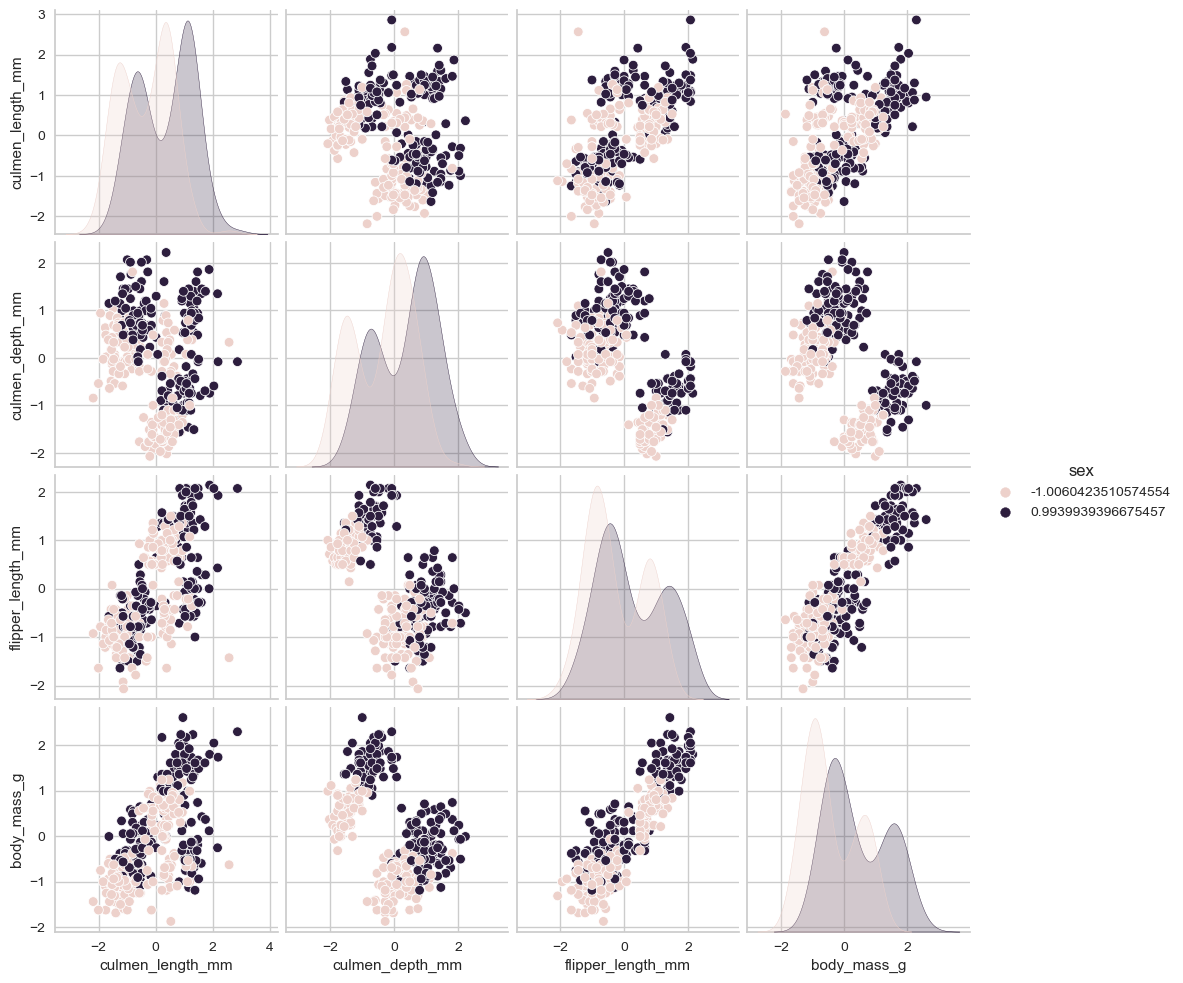

In [89]:
sns.pairplot(penguins_dsscaled, hue='sex')

In [110]:
#PCA Analysis
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_dsscaled)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.25)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_dsscaled)
print(n_components)

2


In [104]:
#K-Means Clustering
model=KMeans()
n_init=10

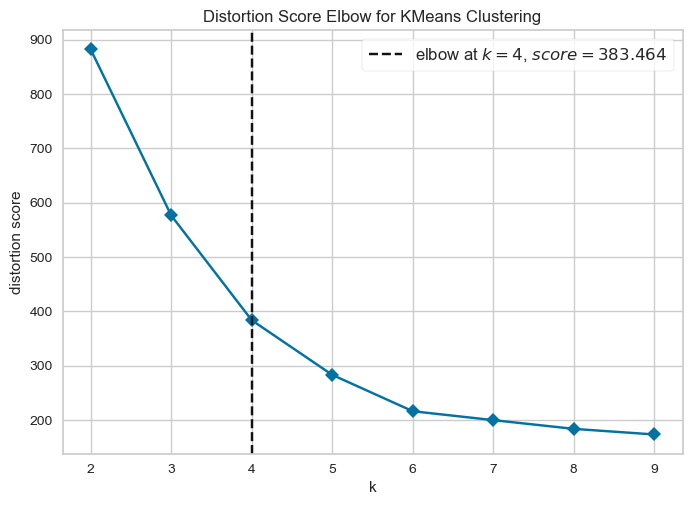

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:

#Elbow Method: Optimal K-value Determination Test
#     Distortion Metric    #
visualizer=KElbowVisualizer(model,k=(2,10),timings=False)
visualizer.fit(penguins_dsscaled)
visualizer.show()

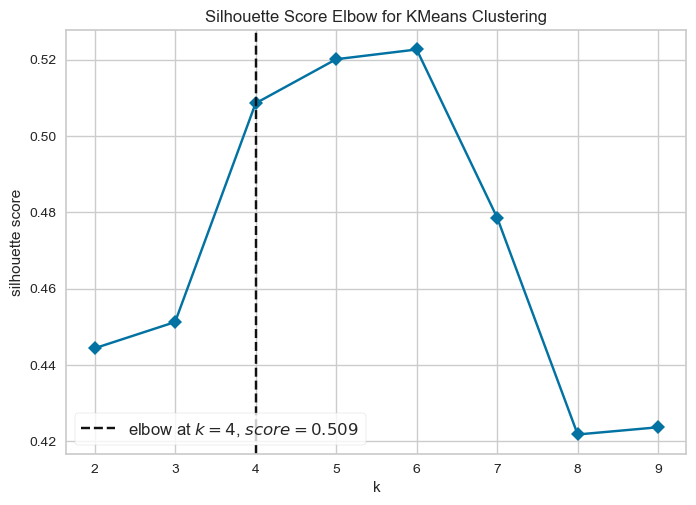

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [106]:
#Elbow Method: Optimal K-value Determination Test
#     Silhouette Metric    #
visualizer=KElbowVisualizer(model,k=(2,10),metric='silhouette',timings=False)
visualizer.fit(penguins_dsscaled)
visualizer.show()

In [112]:
#Final Model --> K-Value = 4 (Silhouette Score Elbow for KMeans Clustering showed Score=0.636)
model=KMeans(4,random_state=42).fit(penguins_PCA)


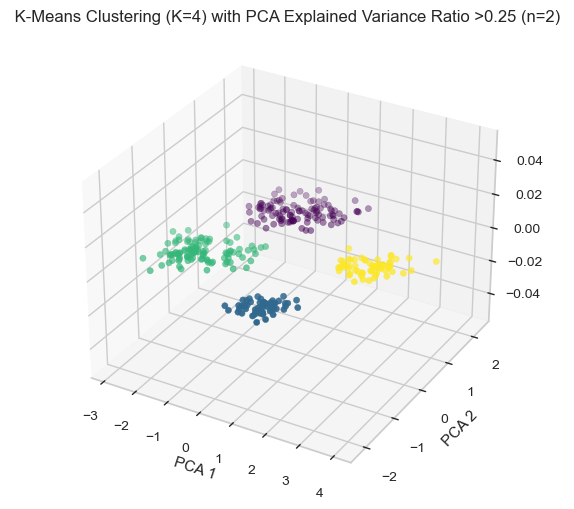

In [111]:
# PCA --> 2 Components were shown to be necessary when the explained variance ratio for each principal component was larger than 25%
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=model.labels_, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title(' K-Means Clustering (K=4) with PCA Explained Variance Ratio >0.25 (n=2) ')
plt.show()

In [ ]:
# Analysis Notes:
#PCA 1 shows variations between -3 and 1  (variation doesn't seem specific to a single feature, but may be a representation of the combination of multiple features)
# PCA 2 shows variations between 0 and 2 which are values in the range associated with culmen_depth_mm
